# Исследование объявлений о продаже квартир

В вашем распоряжении данные — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучу общую информацию. 

In [1]:
import pandas as pd

Попробуем прочесть данные из файла.
После вывода на экран первых строк архива, стало понятно, что данные склеились в одну строку. Попробуем исправить это, используя дополнительный аргумент функции read_csv() - 'sep'. Чтобы увидеть все колонки, достаточно в аргументах .set_option() указать 30.

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
except:
    print("could not open the file")
pd.set_option('display.max_columns', 30)
data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Изучим данные архива, используя .info()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Построим гистораммы:

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

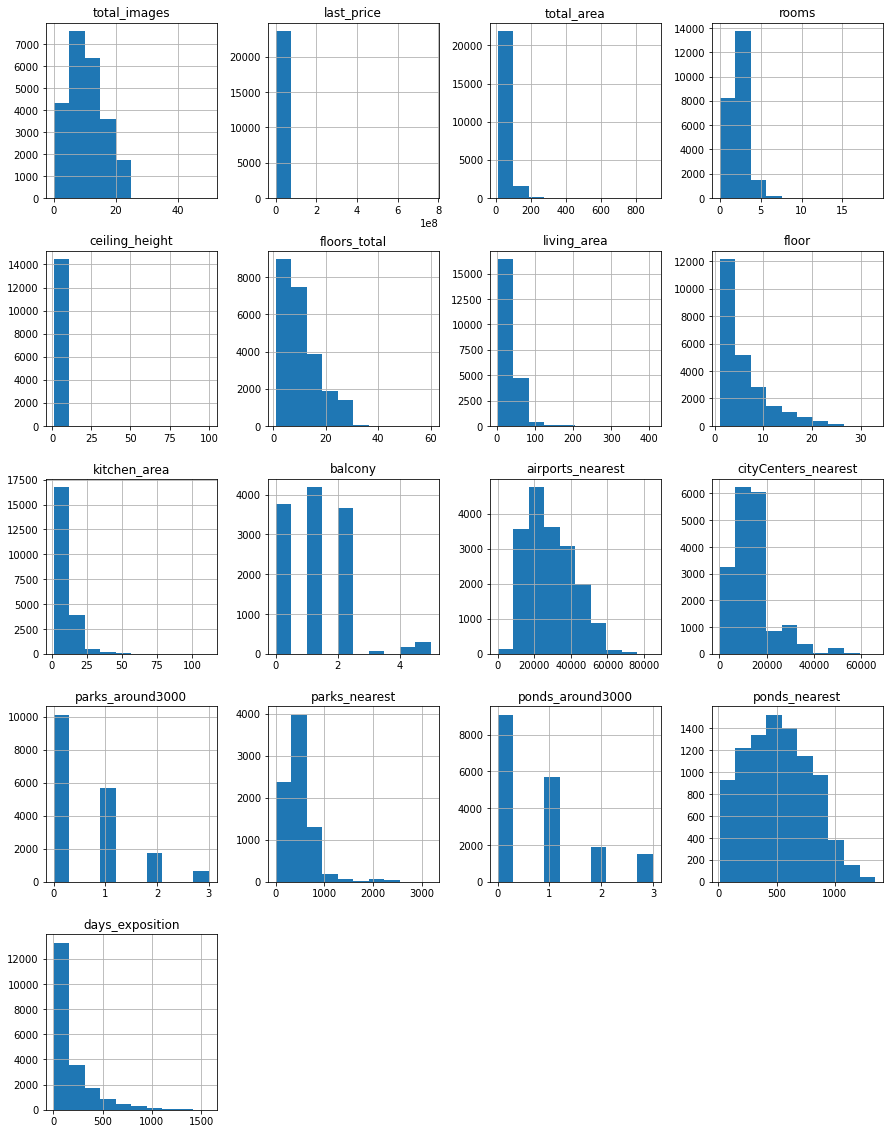

In [4]:
data.hist(figsize = (15,20))

Получается, что в таблице содержится 22 столбца, описывающих 23699 объектов. Разница в количестве данных по столбцам, говорит о том, что пропуски есть. Столбцы содержат данные типа bool, float64, int64 и object. Колонка 'first_day_exposition' содержит строковый тип данных, который необходимо изменить на временной для удобства работы с ним. Колонка 'is_apartment' содержит информацию, которая может отражать два состояния, поэтому  логичнее заменить ее на bool. Это также сэкономит ресурс компьютера. В столбцах 'last_price', 'floors_total', 'balcony', 'days_exposition' использование типа данных float64 кажется избыточным и напрасно нагружает память компьютера. Int в этих случаях кажется более подходящим.
Название столбца cityCenters_nearest не соответствует рекомендованому в python стилю, необходимо исправить его на "city_centers_nearest" .

### Предобработка данных

Для начала переименуем столбец cityCenters_nearest в city_сenters_nearest

In [5]:
data.rename(columns = {"cityCenters_nearest" : "city_centers_nearest"}, inplace = True)
data.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0


In [6]:
import numpy as np

Теперь поработаем с типом данных. Необходимо заменить в некоторых ячейках float на int, а в некоторых строчные данные на логические и временные.

Для цены и количества дней подойдет тип int64:

In [7]:
try:
    data['last_price'] = data['last_price'].astype('int64')
except:
    print('failed last_price')

try:
    data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], errors='coerce')).astype('Int64')
except:
    print('failed days_exposition')


Для количества этажей  и балконов достаточно int8

In [8]:
try:
    data['floors_total'] = data['floors_total'].astype('Int8')
except:
    print('failed floors_total')
    
try:
    data['floor'] = data['floor'].astype('Int8')
except:
    print('failed floor')  

try:
    data['balcony'] = data['balcony'].astype('Int8')
except:
    print('failed balcony')


В колонке 'is_apartment' заменим тип данных на bool. Пропущенные значения примем как False

In [9]:
try:
    data['is_apartment'] = data['is_apartment'].map({"True": True, "False": False})
except:
    print("is_apartmen failed")
data['is_apartment'] = data['is_apartment'].fillna(False)

в столбце "first_day_exposition" заменим строковые данные на время

In [10]:
try:
    data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")
except:
    print("failed first_day_exposition")

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  Int8          
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  Int8          
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

Посмотрим сколько и каких значений пропущено

In [12]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В колонке 'is_apartment' все пропуски мы уже заменили на False. 

В 9195 случаях пропущена высота потолка, скорее всего они до 2,6м включительно. Иначе бы указали как дополнительный плюс. Но это важный параметр при выборе квартиры, может быть решающим, поэтому смысла заменять его нет.

86 значений 'floors_total' отсутсвуют. Вероятнее всего не заполнили. Уберем строки с пропусками.

In [13]:
data['floors_total'].dropna(inplace = True)

1903 значения жилой площади тоже нет, скорее всего просто не заполнили. Оставим пропуски.

Касательно кухни возможный вариант, что ее в квартире просто нет, либо это квартира-студия.

11519 пропусков в колонке с балконами скорее всего означают, что их попросту нет, заменим их на 0.

In [14]:
data['balcony'] = data['balcony'].fillna(0)

С пропусками в колонке "locality_name" мы ничего сделать не сможем, при этом их 49. Просто удалим строки с пропусками в этом столбце.

In [15]:
data['locality_name'].dropna(inplace = True)


Колонки 'airports_nearest', 'city_centers_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest' говорят о дополнительных плюсах квартиры и, поскольку эти ячейки не были заполнены, скорее всего этих приимуществ нет, значит оставляем пропуски.

Если в колонке с количеством дней публикации пропуск, предположим, что публикации не было.

In [16]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты. Для начала посмотрим сколько всего уникальных названий в столбце:

In [17]:
data['locality_name'].unique().shape[0]

365

Посмотрим содержимое столбца:

In [18]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Первое, что бросается в глаза - использование в одних и тех же словах то буквы "е" то "ё". Заменим все на "е", предварительно переведя весь текст в нижний регистр:

In [19]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё','е')

In [20]:
data['locality_name'].unique().shape[0]

331

In [21]:
data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет

Очевидно, что городской поселок и поселок городского типа - это одно и то же. Заменим "городской поселок" на "поселок городского типа".

In [22]:
data['locality_name'] = data['locality_name'].str.replace("городской поселок", "поселок городского типа")

In [23]:
print("после обработки, количество уникальных значений:")
data['locality_name'].unique().shape[0]

после обработки, количество уникальных значений:


324

Если «поселок Рябово» и «поселок городского типа Рябово» - это один и тот же населённый пункт, то заменим название на "поселок городского типа Рябово":

In [24]:
data['locality_name'] = data['locality_name'].str.replace("поселок рябово", "поселок городского типа рябово")
data['locality_name'].unique().shape[0]

323

Посмотрим наличие явных дубликатов:

In [25]:
print('Количество дубликатов после обработки:')
data.duplicated().sum()

Количество дубликатов после обработки:


0

Находим и устраняем редкие и выбивающиеся значения.

Для начала с помощью .describe() посмотрим как распределились данные:

In [26]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


total_images - ничего выдающегося, можно оставить всё как есть

last_price
Посмотрим на гистограмму:

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

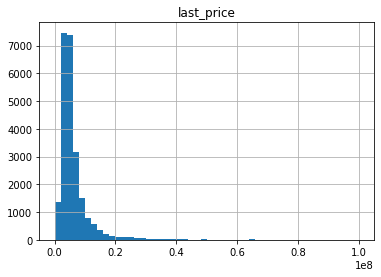

In [27]:
data.hist('last_price', bins = 50, range = (0, 100000000))

In [28]:
print("Количество квартир, стоимостью меньше 500000:", data.query('last_price<500000')['last_price'].count())

Количество квартир, стоимостью меньше 500000: 14


In [29]:
print("Количество квартир, дороже 50млн:", data.query('last_price>50000000')['last_price'].count())
print("Количество квартир, дороже 100млн:", data.query('last_price>100000000')['last_price'].count())
print("Количество квартир, дороже 200млн:", data.query('last_price>200000000')['last_price'].count())


Количество квартир, дороже 50млн: 131
Количество квартир, дороже 100млн: 37
Количество квартир, дороже 200млн: 9


Думаю, можно избавиться от квартир, дороже 100млн и дешевле 500000

In [30]:
data.drop(index=data.query('last_price<500000').index, inplace=True)
data.drop(index=data.query('last_price>100000000').index, inplace=True)


array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

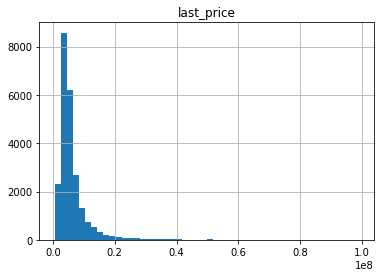

In [31]:
data.hist('last_price', bins = 50)

Общая площадь

Посмотрим на квартиры с подозрительно маленькой площадью. Сейчас рынок предлагает студии, которые могут иметь небольшие площади, надо быть аккуратной.

In [32]:
print("Количество квартир, меньше 15 кв.м:", data.query('total_area<15')['total_area'].count())
print("Количество квартир, меньше 20 кв.м:", data.query('total_area<20')["total_area"].count())
print("Количество квартир, меньше 25 кв.м:", data.query('total_area<25')["total_area"].count())


Количество квартир, меньше 15 кв.м: 6
Количество квартир, меньше 20 кв.м: 27
Количество квартир, меньше 25 кв.м: 190


И на квартиры с очень большой площадью.

In [33]:
print('Количество квартир, больше 1000 кв.м', data.query('total_area >1000')['total_area'].count())
print('Количество квартир, больше 700 кв.м', data.query('total_area>700')['total_area'].count())
print("Количество квартир, больше 500 кв.м", data.query('total_area>500')['total_area'].count())
print("Количество квартир, от 400 кв.м", data.query('total_area>=400')['total_area'].count())
print("Количество квартир, от 350 кв.м", data.query('total_area>=350')['total_area'].count())


Количество квартир, больше 1000 кв.м 0
Количество квартир, больше 700 кв.м 0
Количество квартир, больше 500 кв.м 3
Количество квартир, от 400 кв.м 16
Количество квартир, от 350 кв.м 30


Пожалуй, стоит избавиться от квартир, площадью меньше 20 и больше 400кв.м

In [34]:
data.drop(index=data.query('total_area<20 or total_area>400').index, inplace=True)

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

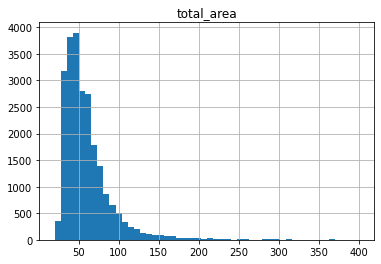

In [35]:
data.hist('total_area',bins = 50)

количество комнат

In [36]:
data["rooms"].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10,  9, 19, 16])

Здесь, похоже всё в порядке, оставим как есть

высота потолков

Если предположить, что минимальная высота потолка в квартире 2,3м а максимальная 5,5 (например в сталинке или в дореволюционном фонде, который в Петербурге присутствует, то можно выделить этот диапазон как норму. Все значения меньше будем считать выбросами, все значения от 23 до 55 будем считать написанными без запятой (потом поделим ее на 10), все значения от 230  до 550 (если такие будут) будем считать записанными в см (потом поделим ее на 100). Прочие данные будем считать выбросами.

In [37]:
print("Квартир, высотой до 2,3м:",data.query('ceiling_height<2.3')['ceiling_height'].count())
print("Квартир, высотой от 2,3м до 5,5м:",data.query('ceiling_height >= 2.3 and ceiling_height <=5.5')['ceiling_height'].count())
print("Квартир, высотой от 5,5м до 23м:",data.query('ceiling_height > 5.5 and ceiling_height < 23')['ceiling_height'].count())
print("Квартир, высотой от 23м до 55м:",data.query('ceiling_height >= 23 and ceiling_height <=55')['ceiling_height'].count())
print("Квартир, высотой от 55м до 230м:",data.query('ceiling_height > 55 and ceiling_height < 230')['ceiling_height'].count())
print("Квартир, выше 230м:",data.query('ceiling_height > 230')['ceiling_height'].count())


Квартир, высотой до 2,3м: 16
Квартир, высотой от 2,3м до 5,5м: 14403
Квартир, высотой от 5,5м до 23м: 10
Квартир, высотой от 23м до 55м: 20
Квартир, высотой от 55м до 230м: 1
Квартир, выше 230м: 0


Получается, имеем два рабочих диапазона: нормальный и тот, который будем делить на десять. Остальное уберем.

In [38]:
data.drop(index = data.query('(ceiling_height<2.3)or(ceiling_height>55)or(ceiling_height>5.5 and ceiling_height<23)').index, inplace = True)
data.update(data[(data['ceiling_height']>=23) & (data['ceiling_height']<=55)]['ceiling_height']/10)


array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

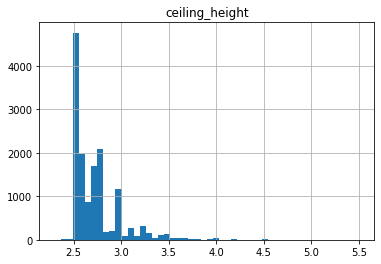

In [39]:
data.hist('ceiling_height', bins = 50)

Как видно на гистограмме, на 2,5м приходится пик, что похоже на правду, поскольку это типичная высота старого фонда, состоящего из хрущёвок и брежневок, кроме того, основная часть нового фонда эконом-класса имеет высоту потолка до 2,6м. Кроме того, высота потолка редко бывает 2,8 - 2,9м, что тоже отражается на гистограмме. 3м - еще один стандарт, здесь опять всплеск.

floors_total

Посмотрим диапазон этажностей представленных домов

In [40]:
floors_unique = data['floors_total'].unique()
print(floors_unique)
print("Минимальная этажность:", floors_unique.min())
print("Максимальная этажность:",floors_unique.max())


<IntegerArray>
[  16,   11,    5,   14,   12,   26,   24,   27,    9,    6,   17,   25,    3,
   23,   19,   18,    4,   22,    8,    2,   10,    7,   13,   15, <NA>,   20,
   28,   36,   21,   35,   34,   60,    1,   29,   33,   52]
Length: 36, dtype: Int8
Минимальная этажность: 1
Максимальная этажность: 60


Этажность хорошая, этажей, ниже первого нет, 60й этаж в Петербурге возможен.

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

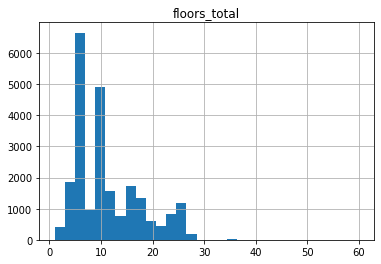

In [41]:
data.hist('floors_total', bins = 30)

жилая площадь

<AxesSubplot:>

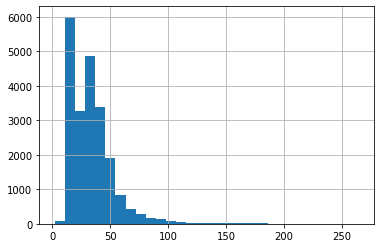

In [42]:
data['living_area'].hist(bins = 30)

In [43]:
print("Квартир, с жилплощадью более 190 кв.м:", data.query('living_area > 190')['living_area'].count())
print("Квартир, с жилплощадью меньше 10 кв.м:", data.query('living_area < 10')['living_area'].count())


Квартир, с жилплощадью более 190 кв.м: 19
Квартир, с жилплощадью меньше 10 кв.м: 24


Похоже, мы можем избавиться от квартир, жилой площадью меньше 10 и больше 190кв.м

In [44]:
data.drop(index=data.query('living_area<10 or living_area>190').index, inplace = True)

Этаж, на котором расположена квартира

Здесь стоит проверить, что заявленный этаж не больше этажности дома

In [45]:
print("Количество объявлений, в которых заявленный этаж выше этажности дома:", data.query('floor>floors_total')['floor'].count())

Количество объявлений, в которых заявленный этаж выше этажности дома: 0


<AxesSubplot:>

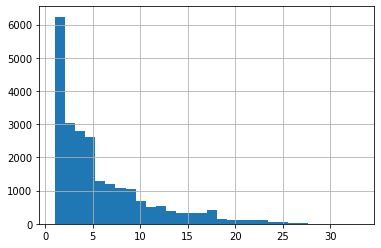

In [46]:
data['floor'].hist(bins = 30)

Как видим, максимум приходится на первый этаж. Ну, во-первых он есть в доме любой этажности, во-вторых такие квартиры дольше продаются, больше накапливается объявлений. В остальном неплохо.

площадь кухни

In [47]:
kitchen_uni = data['kitchen_area']
print("Минимальная  и максимальная площадь кухни", kitchen_uni.min(), ', ', kitchen_uni.max())


Минимальная  и максимальная площадь кухни 1.3 ,  107.0


<AxesSubplot:>

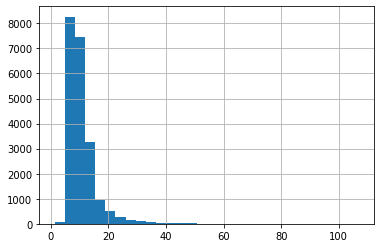

In [48]:
data['kitchen_area'].hist(bins = 30)

<AxesSubplot:>

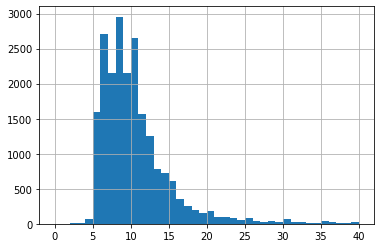

In [49]:
data['kitchen_area'].hist(bins = 40, range = (0, 40))

Очень мало кухонь, площадью менее 5 и более 40кв.м. Можно от них избавиться

In [50]:
data.drop(index = data.query('kitchen_area<4 or kitchen_area >30').index,inplace=True)

количество балконов

<AxesSubplot:>

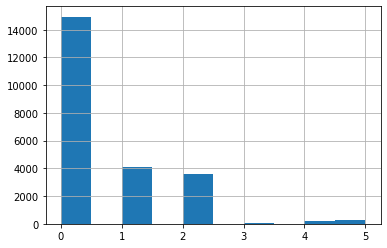

In [51]:
data['balcony'].hist()

Здесь всё в порядке, оставим.

ближайший аэропорт

<AxesSubplot:>

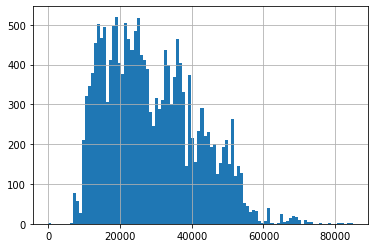

In [52]:
data['airports_nearest'].hist(bins = 100)

In [53]:
data.query('airports_nearest < 1000')['airports_nearest'].count()

1

Видим квартиру, которая случайно "забрела" ближе 1000 м к аэропорту. Уберем её.

In [54]:
data.drop(index = data.query('airports_nearest<1000').index, inplace = True)

близость к центру

<AxesSubplot:>

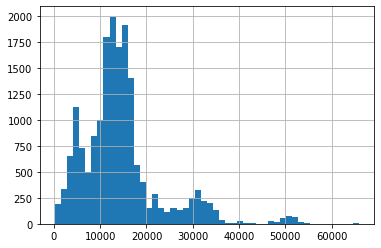

In [55]:
data['city_centers_nearest'].hist(bins = 50)

In [56]:
print("Квартир, дальше 55км от центра:", data.query('city_centers_nearest > 55000')['city_centers_nearest'].count())

Квартир, дальше 55км от центра: 12


Как видим, квартир, расположенных далее 55км от центра 12, можно удалить

In [57]:
data.drop(index= data.query('city_centers_nearest>55000').index, inplace = True)

Парков, ближе 3км

<AxesSubplot:>

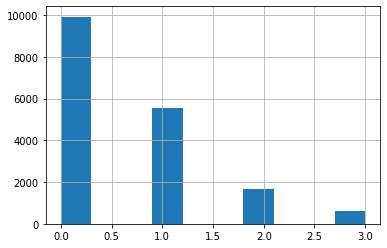

In [58]:
data['parks_around3000'].hist()

Здесь все в порядке, оставим

парки поблизости

<AxesSubplot:>

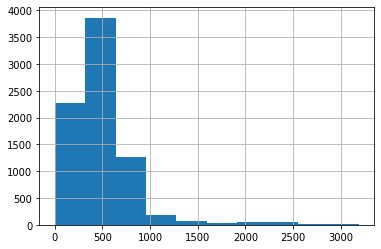

In [59]:
data['parks_nearest'].hist()

Здесь тоже всё хорошо

прудов, ближе 3км

<AxesSubplot:>

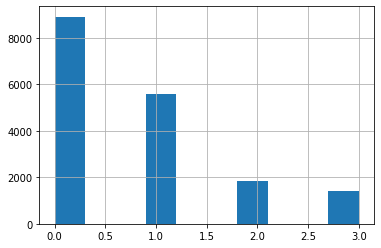

In [60]:
data['ponds_around3000'].hist()

Всё нормально, остаётся

ближайшие пруды

<AxesSubplot:>

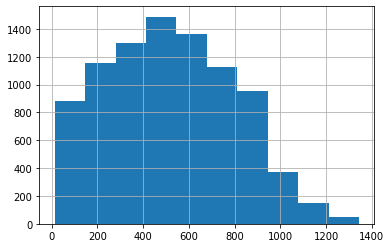

In [61]:
data['ponds_nearest'].hist()

дата размещения объявлений

In [62]:
print('Неопубликованных обявлений:', data.query('days_exposition == 0')['days_exposition'].count())
print("Объявлений, которые висят более 2х лет: ", data.query('days_exposition>365*2')['days_exposition'].count())
print("Объявлений, которые висят более 3х лет: ", data.query('days_exposition>365*3')['days_exposition'].count())


Неопубликованных обявлений: 0
Объявлений, которые висят более 2х лет:  722
Объявлений, которые висят более 3х лет:  157


Пожалуй, от объявлений, которые висят более трёх лет стоит избавиться. Неопубликованных нет, это хорошо.

In [63]:
data.drop(index = data.query('days_exposition > 365*3').index, inplace = True)

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

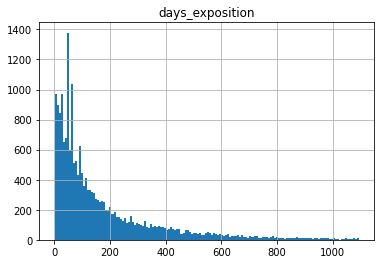

In [64]:
data.hist('days_exposition', bins = 150)

После того, как подчистили все данные, надо обновить индексацию:

In [65]:
data.reset_index(drop = True, inplace = True)

Определила и заполнила, где необходимо пропущенные значения, изменила типы данных на более быстрые, логичные и удобные, устранила дубликаты в названиях населённых пунктов и аномалии в столбцах

### Посчитайте и добавьте в таблицу новые столбцы

Добавим в таблицу столбцы со значением  
цены за квадратный метр:

In [66]:
data['price_one_metr'] = round(data['last_price']/data['total_area'])

день публикации объявления:

In [67]:
data["day_of_the_week"] = data['first_day_exposition'].dt.weekday

месяц публикации объявления

In [68]:
data['month_of_exposition'] = data['first_day_exposition'].dt.month

год публикации объявления

In [69]:
data['year_of_exposition'] = data['first_day_exposition'].dt.year

тип этажа квартиры (значения — «первый», «последний», «другой»)

In [70]:
data["type_of_floor"] = data.apply(lambda x: "первый" if (x.floor == 1) 
    else ("последний" if (x.floor == x.floors_total) & isinstance(x.floors_total,int) 
    else "другой"), axis=1)

расстояние в км от центра города

In [71]:
data['center_distance_km'] = round(data['city_centers_nearest']/1000).astype('Int32')
data.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_metr,day_of_the_week,month_of_exposition,year_of_exposition,type_of_floor,center_distance_km
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,<NA>,120370.0,3,3,2019,другой,16
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,82921.0,1,12,2018,первый,19


Добавила в таблицу: цена одного квадратного метра, день публикации объявления (0 - понедельник, 1 - вторник и т.д.), месяц публикации объявления, год публикации объявления, тип этажа квартиры (значения — «первый», «последний», «другой»), расстояние в км до центра города.

### Проведем исследовательский анализ данных

In [72]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_metr,day_of_the_week,month_of_exposition,year_of_exposition,center_distance_km
count,23056.000000,2.305600e+04,23056.000000,23056.000000,14055.000000,22974.000000,21208.000000,23056.000000,20834.000000,23056.000000,17588.000000,17609.000000,17610.000000,7758.000000,17610.000000,8745.000000,19974.000000,23056.000000,23056.000000,23056.000000,23056.000000,17609.000000
mean,9.830283,5.969748e+06,58.464261,2.045585,2.718754,10.705798,33.587637,5.895732,10.071485,0.593425,28781.065499,14287.943438,0.602328,490.956045,0.758206,522.017038,171.103885,97546.222545,2.573170,6.403973,2017.386450,14.281674
std,5.656536,5.600984e+06,28.992006,1.033406,0.264969,6.600978,18.893441,4.886184,4.159963,0.957858,12644.585281,8501.217723,0.794813,337.094541,0.930318,277.192696,196.866194,41201.894823,1.789322,3.488938,1.018219,8.508164
min,0.000000,5.000000e+05,20.000000,0.000000,2.300000,1.000000,10.000000,1.000000,4.000000,0.000000,6450.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,9615.000000,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.500000,5.000000,18.600000,2.000000,7.000000,0.000000,18488.000000,9496.000000,0.000000,289.000000,0.000000,302.000000,44.000000,76239.000000,1.000000,3.000000,2017.000000,9.000000
50%,9.000000,4.600000e+06,51.400000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26765.000000,13171.000000,0.000000,456.000000,0.000000,507.000000,93.000000,94565.000000,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.600000e+06,68.100000,3.000000,2.800000,16.000000,42.000000,8.000000,11.725000,1.000000,37347.000000,16360.000000,1.000000,613.000000,1.000000,733.000000,224.000000,113233.500000,4.000000,10.000000,2018.000000,16.000000
max,50.000000,9.900000e+07,400.000000,14.000000,5.500000,60.000000,190.000000,33.000000,30.000000,5.000000,73827.000000,54926.000000,3.000000,3190.000000,3.000000,1344.000000,1095.000000,848485.000000,6.000000,12.000000,2019.000000,55.000000


 изучим и опишем следующие параметры:
    - общая площадь

<AxesSubplot:>

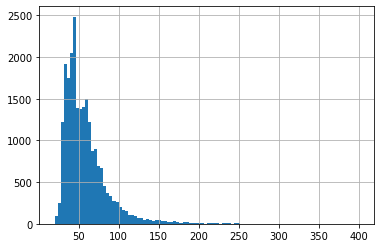

In [73]:
data['total_area'].hist(bins = 100)

In [74]:
print("Недвижимость, площадью более 160кв.м: ", data.query('total_area>160')['total_area'].count()/len(data['total_area']))
print("Недвижимость, площадью менее 28кв.м: ", data.query('total_area<28')['total_area'].count()/len(data['total_area']))

Недвижимость, площадью более 160кв.м:  0.013098542678695351
Недвижимость, площадью менее 28кв.м:  0.015093684941013185


<AxesSubplot:>

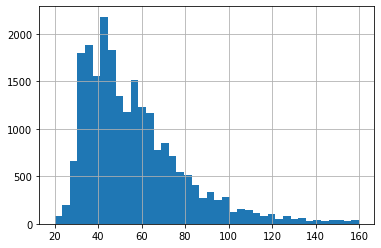

In [75]:
data['total_area'].hist(bins = 40, range = (20, 160))

<AxesSubplot:>

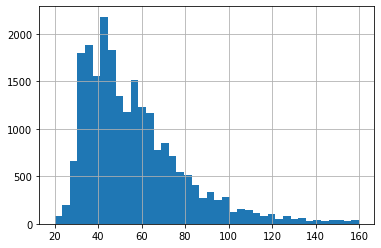

In [76]:
data['total_area'].hist(bins = 40, range = (20, 160))

In [77]:
data['total_area'].describe()

count    23056.000000
mean        58.464261
std         28.992006
min         20.000000
25%         40.000000
50%         51.400000
75%         68.100000
max        400.000000
Name: total_area, dtype: float64

Наблюдается пик у квартир площадью 30-36 кв м. Видимо, это самая популярная площадь однушек. Еще больше пик у квартир 40-42кв.м, самый высокий у квартир 40-46. Это могут быть как просторные однушки, так и хрущевские двушки. Основной диапазон продаж находится в границах 40-68 кв.м. Недвижимости, площадью более 160кв.м около 1,8%, площадью менее 28кв.м около 1,5%.

- жилая площадь

In [78]:
data['living_area'].describe()

count    21208.000000
mean        33.587637
std         18.893441
min         10.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        190.000000
Name: living_area, dtype: float64

<AxesSubplot:>

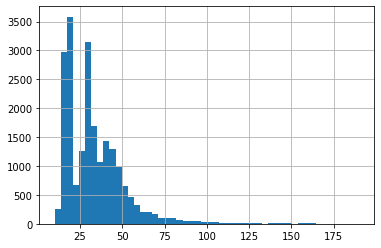

In [79]:
data['living_area'].hist(bins = 50)

<AxesSubplot:>

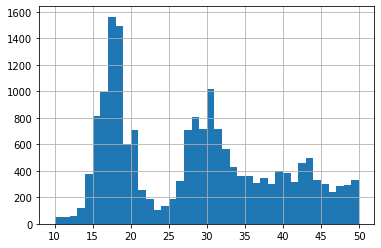

In [80]:
data['living_area'].hist(bins = 40, range = (10, 50))

Здесь, так же как и по общей площади, наблюдается два основных пика - 15-21кв.м, видимо для однушек, и 22-34, скорее всего у двухкомнатных. В районе 22-26кв.м резкий спад. Скорее всего это связано с тем, что для однокомнатных квартир эта площадь уже большая, а для двухкомнатных недостаточная. Также видим резкий спад после 50кв.м. Это обусловлено меньшим спросом на квартиры с большей общей площадью.

 - площадь кухни

In [81]:
data['kitchen_area'].describe()

count    20834.000000
mean        10.071485
std          4.159963
min          4.000000
25%          7.000000
50%          9.000000
75%         11.725000
max         30.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

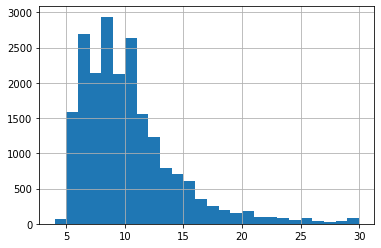

In [82]:
data['kitchen_area'].hist(bins = 26)

Распределение по кухням выглядит логично. 5-7 метровые кухни - наследие советского периода, таких квартир в спальных районах города много. В современных квартирах и новостройках кухни обычно больше, чаще всего 8-10кв.м, что и видно на гистограмме. Основная часть кухонь площадью от 7 до 11,7 кв.м. Совсем уж редкость кухни более 25кв.м. 

- цена объекта

In [83]:
data['last_price'].describe()

count    2.305600e+04
mean     5.969748e+06
std      5.600984e+06
min      5.000000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.600000e+06
max      9.900000e+07
Name: last_price, dtype: float64

<AxesSubplot:>

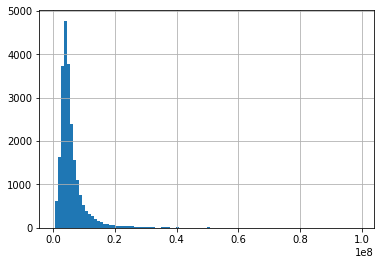

In [84]:
data['last_price'].hist(bins=100)

<AxesSubplot:>

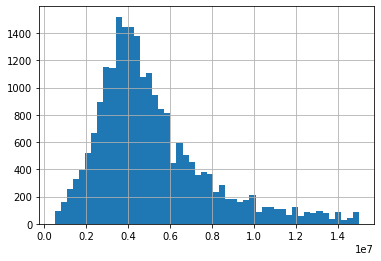

In [85]:
data['last_price'].hist(bins=50, range=(500000, 15000000))

Гистограмма цены выглядит логично, есть небольшой провал в районе 6 млн. Очень приличное смещение вправо, это тоже предсказуемо, поскольку возможны квартиры большой площади, у парка, пруда, в центре города с дорогим ремонтом. Все это скажется на цене. Но таких квартир, соответственно, немного.

- количество комнат

<AxesSubplot:>

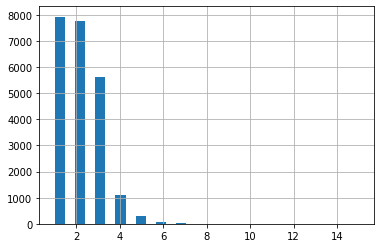

In [86]:
data['rooms'].hist(bins = 30, range = (1,15))

In [87]:
print("Однокомнатных квартир:", data.query('rooms==1')['rooms'].count()*100/len(data['rooms']), "процентов")
print("Двухкомнатных квартир:", data.query('rooms==2')['rooms'].count()*100/len(data['rooms']), "процентов")
print("Трёхкомнатных квартир:", data.query('rooms==3')['rooms'].count()*100/len(data['rooms']), "процентов")

Однокомнатных квартир: 34.40752949340735 процентов
Двухкомнатных квартир: 33.761276891047885 процентов
Трёхкомнатных квартир: 24.414469118667594 процентов


Больше всего на рынке представлено одно- и двухкомнатных квартир, 34,4% и 33,8% соответственно. Немного меньше трёшек, около 24,1%. Значительно меньше четырехкомнатных, и совсем мало квартир с количеством комнат больше четырёх.

- высота потолков

<AxesSubplot:>

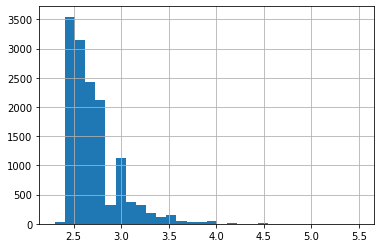

In [88]:
data['ceiling_height'].hist(bins = 30)

Здесь тоже пики располагаются вполне логично. Больше всего квартир с потолками 2,5м, это минимальный стандарт самых доступных по цене квартир. 2.6, 2.7, 2.8  и 3.0 - тоже стандарты.

  - этаж квартиры

<AxesSubplot:>

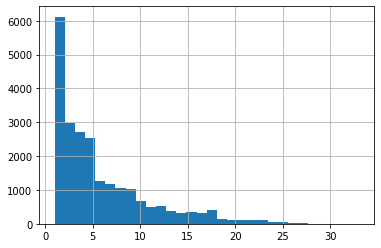

In [89]:
data['floor'].hist(bins = 30)

In [90]:
data.query('floor < 5')['floor'].count()*100/len(data['floor'])

51.279493407356

Больше всего предложение на первом этаже. Возможно, это связано с тем, что квартиры на первом этаже продаются медленнее.Кроме того, первый этаж есть в домах любой этажности. Больше 51% квартир в продаже расположены с первого по четвёртый этаж. 

- тип этажа квартиры («первый», «последний», «другой»)

<AxesSubplot:>

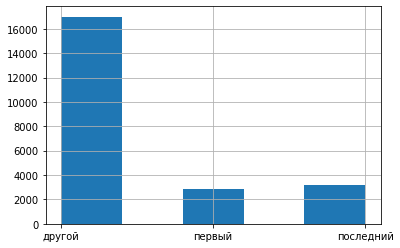

In [91]:
data['type_of_floor'].hist(bins = 5)

Ожидаемо, на первом месте средние этажи. Количество первых и последних этажей отличается незначительно.

  - общее количество этажей в доме

<AxesSubplot:>

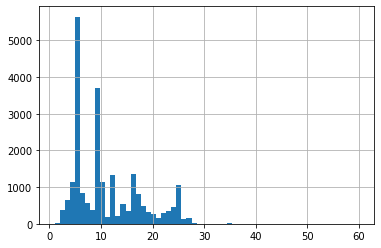

In [92]:
data['floors_total'].hist(bins = 60)

<AxesSubplot:>

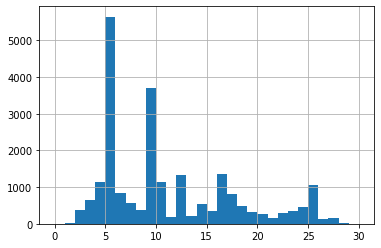

In [93]:
data['floors_total'].hist(bins = 30, range = (0, 30))

In [94]:
print("Количество пятиэтажек:", data.query('floors_total == 5')['floors_total'].count()*100/len(data['floors_total']))
print("Количество девятиэтажек:", data.query('floors_total == 9')['floors_total'].count()*100/len(data['floors_total']))
print("Количество двенадцатиэтажек:", data.query('floors_total == 12')['floors_total'].count()*100/len(data['floors_total']))
print("Количество шестнадцатиэтажек:", data.query('floors_total == 16')['floors_total'].count()*100/len(data['floors_total']))

Количество пятиэтажек: 24.488202637057597
Количество девятиэтажек: 16.11727966689799
Количество двенадцатиэтажек: 5.820610687022901
Количество шестнадцатиэтажек: 5.837959750173491


Максимальное количество домов, в которых расположены продаваемые квартиры - пятиэтажные (24.5%), немного меньше девятиэтажек (16.1%), за ними идут двенадцати- и шестнадцатиэтажные дома (по 5.8%). Всё это типовые проекты. Еще два пика на десяти- и двадцатипятиэтажных домах. Домов, этажностью более 28 совсем мало.

- расстояние до центра города в метрах

<AxesSubplot:>

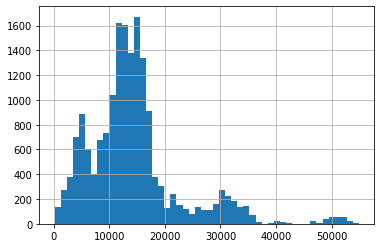

In [95]:
data['city_centers_nearest'].hist(bins = 50)

<AxesSubplot:>

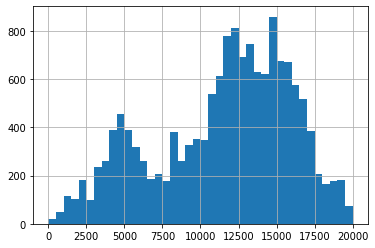

In [96]:
data['city_centers_nearest'].hist(bins = 40,range = (0, 20000))

Здесь два пика: поменьше в районе 5км (вероятнее всего центр города) и побольше 11-15км (скорее всего спальные районы с большой застройкой). Еще небольшие пики около 21км и 30км.

- расстояние до ближайшего аэропорта

<AxesSubplot:>

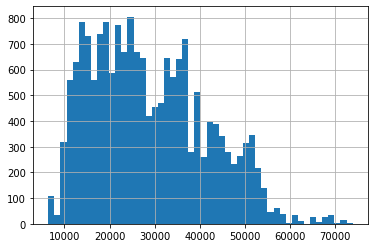

In [97]:
data['airports_nearest'].hist(bins = 50)

Вполне нормальный график

- расстояние до ближайшего парка

<AxesSubplot:>

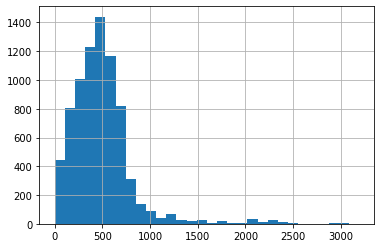

In [98]:
data['parks_nearest'].hist(bins = 30)

Основная часть квартир находится на расстоянии до 1км от парка, больше всего - на расстоянии 500м.

- день и месяц публикации объявления

<AxesSubplot:>

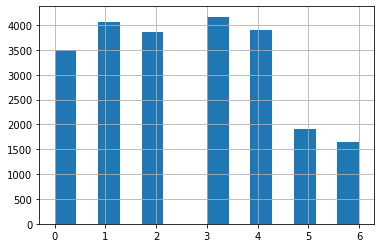

In [99]:
data['day_of_the_week'].hist(bins = 14, range = (0,6))

Больше всего объявлений публиковалось в четверг и во вторник, меньше всего в воскресенье и субботу.

<AxesSubplot:>

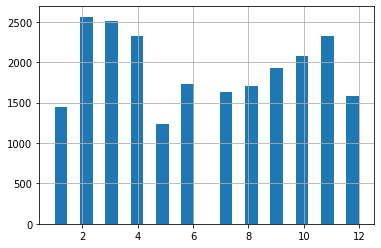

In [100]:
data['month_of_exposition'].hist(bins = 24, range=(1,12))

Меньше всего объявлений было опубликовано в декабре, мае и январе, больше всего - с февраля по апрель и в ноябре.

Посмотрим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.

<AxesSubplot:>

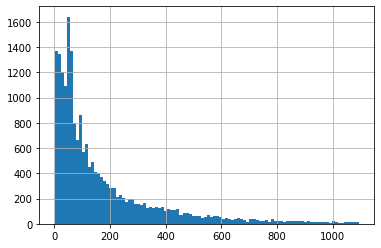

In [101]:
data['days_exposition'].hist(bins = 100)

<AxesSubplot:>

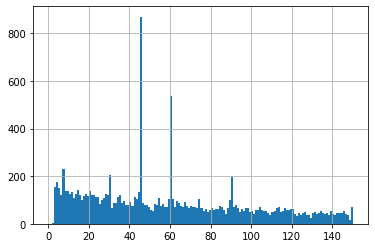

In [102]:
data['days_exposition'].hist(bins = 150, range = (0, 150))

<AxesSubplot:>

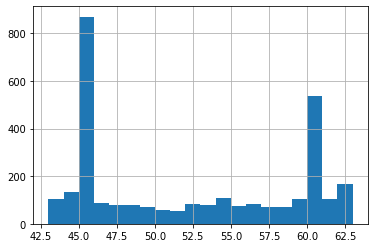

In [103]:
data['days_exposition'].hist(bins = 20, range = (43, 63))

Наблюдаются два очень необычных всплеска продаж на 45й и 60й день. Еще один небольшой всплеск на 90й день. Возможно это связано с резкими скачками инфляции или какими-нибудь важными событиями в политической жизни. А может, это просто были последние рабочие дни перед затяжными выходными или архив чистили от неактуальных объявлений. Кроме того, числа 45, 60 и 90 кажутся необычно круглыми. Возможно у компании, размещающей объявления это периоды, через которые объявления удаляются, если их актуальность не подтверждена или не продлена оплата, если объявления платные. Посчитаем среднее и медиану.

In [104]:
print("Среднее:", data["days_exposition"].mean())
print("Медиана:", data["days_exposition"].median())

Среднее: 171.10388505056574
Медиана: 93.0


Медианное значение отличается от среднего почти в два раза. Это типичное влияние выбросов. Скорее всего в архиве есть так называемые "квартиры-крючки", которых на самом деле не существует и они размещены для привлечения внимания клиента, которому потом торопятся продать другие варианты. Кроме того, существует проблемная недвижимость, которую покупают неохотно, а продают долго. Могут быть квартиры с завышенной ценой, такие тоже долго не прокупают. Вся эта недвижимость может очень повлиять на среднее значение, медиана более устойчива к выбросам.
Я бы оставила среднее время продажи на медианном уровне. Какие из этих продаж можно считать быстрыми, а какие - необычно долгими? На первой гистограмме есть резкий обрыв уровня продаж после девяносто дней и еще один в районе 220 дней. Посмотрим, сколько продаж приходилось на эти периоды.

In [105]:
print('доля объявлений, снятых через 90 дней:', data.query('days_exposition<=90')['days_exposition'].count()*100/data['days_exposition'].count())
print('доля объявлений, снятых через 220 дней:', data.query('days_exposition<=220')['days_exposition'].count()*100/data['days_exposition'].count())

доля объявлений, снятых через 90 дней: 49.00370481626114
доля объявлений, снятых через 220 дней: 74.69710623810954


Как видим, за 90 дней успевают продать почти половину, еще почти 26% от 90 до 220 дней. Я бы оставила эти числа, чтобы отделить быстрые и медленные продажи.

 Выясним, какие факторы больше всего влияют на общую (полную) стоимость объекта. Для этого построим графики, которые покажут зависимость цены от общей площади, жилой площади, площади кухни, количества комнат, типа этажа, на котором расположена квартира и даты размещения. Для подготовки данных перед визуализацией используем сводные таблицы."

- общая площадь

In [106]:
print(f"Корреляция между общей площадью и ценой на квартиру равна: {data['total_area'].corr(data['last_price']):0.1%}")

Корреляция между общей площадью и ценой на квартиру равна: 74.9%


<AxesSubplot:xlabel='last_price', ylabel='total_area'>

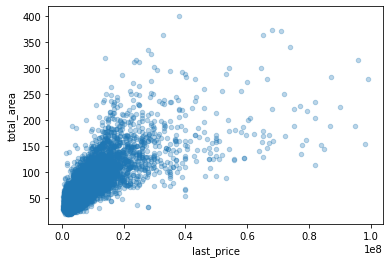

In [107]:
data.plot(x = 'last_price', y = 'total_area', alpha = 0.3, kind = "scatter")

- жилая площадь

In [108]:
print(f"Корреляция между жилой площадью и ценой на квартиру равна: {data['living_area'].corr(data['last_price']):0.1%}")

Корреляция между жилой площадью и ценой на квартиру равна: 66.9%


<AxesSubplot:xlabel='last_price', ylabel='living_area'>

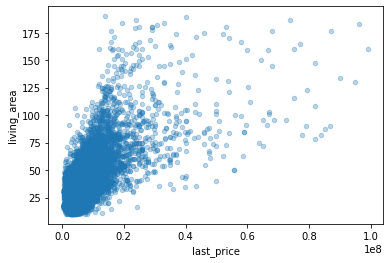

In [109]:

data.plot(x = 'last_price', y = 'living_area',alpha = 0.3, kind = 'scatter')

- площадь кухни

In [110]:
print(f"Корреляция между площадью кухни и ценой на квартиру: {data['kitchen_area'].corr(data['last_price']):0.1%}")

Корреляция между площадью кухни и ценой на квартиру: 52.0%


<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

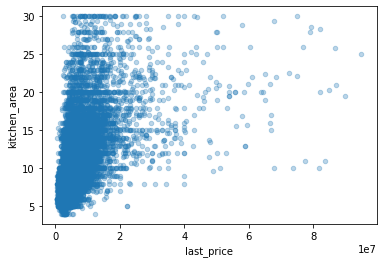

In [111]:
data.plot(x = 'last_price', y = "kitchen_area", alpha = 0.3, kind = 'scatter')

 - количество комнат

In [112]:
print(f"Корреляция между количеством комнат и ценой на квартиру равна: {data['rooms'].corr(data['last_price']):0.1%}")

Корреляция между количеством комнат и ценой на квартиру равна: 46.2%


<AxesSubplot:xlabel='rooms'>

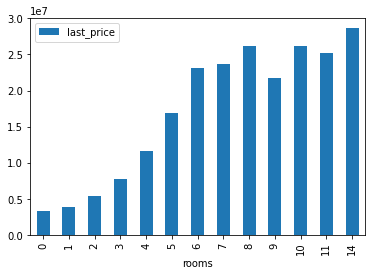

In [113]:
data.pivot_table(index = 'rooms', values = 'last_price').plot(y = 'last_price', kind = 'bar')

- тип этажа

In [114]:
def digit_floor(type_of_floor):
    if type_of_floor == "первый":
        return 1
    if type_of_floor == "последний":
        return 3
    return 2

data['digit_type_of_floor'] = data['type_of_floor'].apply(digit_floor)

In [115]:

print(f"Корреляция между типом этажа и ценой на квартиру равна: {data['digit_type_of_floor'].corr(data['last_price']):0.1%}")

Корреляция между типом этажа и ценой на квартиру равна: 5.8%


<AxesSubplot:xlabel='digit_type_of_floor'>

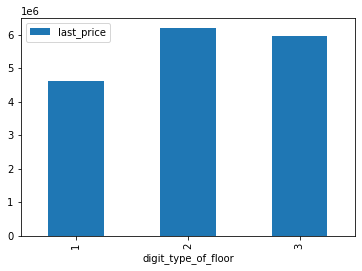

In [116]:
data.pivot_table(index = "digit_type_of_floor", values = 'last_price').plot(y = 'last_price', kind = 'bar')

- дата размещения

In [117]:
print(f"Корреляция между днем недели и ценой на квартиру равна: {data['day_of_the_week'].corr(data['last_price']):0.1%}")

Корреляция между днем недели и ценой на квартиру равна: -0.5%


<AxesSubplot:xlabel='day_of_the_week'>

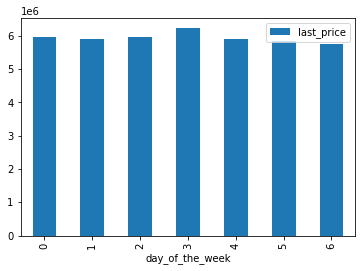

In [118]:
data.pivot_table(index = 'day_of_the_week', values = "last_price").plot(y = 'last_price', kind = 'bar')

In [119]:
print(f"Корреляция между месяцом и ценой квартиры: {data['month_of_exposition'].corr(data['last_price']):0.1%}")

Корреляция между месяцом и ценой квартиры: 1.1%


<AxesSubplot:xlabel='month_of_exposition'>

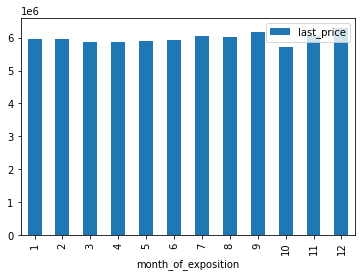

In [120]:
data.pivot_table(index = 'month_of_exposition', values = 'last_price').plot(y = 'last_price', kind = 'bar')

In [121]:
print(f"Корреляция между ценой на квартиру и годом публикации: {data['year_of_exposition'].corr(data['last_price']):0.1%}")

Корреляция между ценой на квартиру и годом публикации: -4.4%


<AxesSubplot:xlabel='year_of_exposition'>

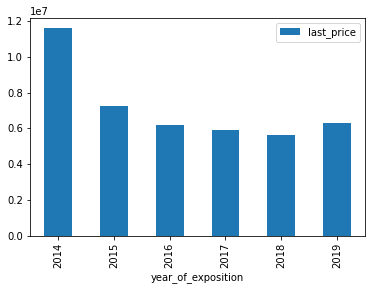

In [122]:
data.pivot_table(index = 'year_of_exposition', values = 'last_price').plot(y = 'last_price', kind = 'bar')

По результатам можно сказать, что цена объекта недвижимости больше всего зависит от общей и жилой площади, в меньшей степени от площади кухни и количества комнат. Мало зависит от этажа, на котором расположена квартира, с небольшой поправкой на первый этаж, где цена несколько ниже и почти не зависит от даты размещения объявления.

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [123]:
count_mean = data.pivot_table(index = 'locality_name',values = "price_one_metr", aggfunc = ['count','sum'])
count_mean.columns = ['count_price_per_metr', 'sum_price_per_metr'] 
count_mean['price_per_metr'] = count_mean['sum_price_per_metr']/count_mean['count_price_per_metr']
count_mean = count_mean.sort_values(by = "count_price_per_metr", ascending = False)
count_mean_10 = count_mean.iloc[:10]
count_mean_10

,count_price_per_metr,sum_price_per_metr,price_per_metr
locality_name,,,
санкт-петербург,15202,1.707202e+09,112301.117879
поселок мурино,550,4.710040e+07,85637.100000
поселок шушары,435,3.417528e+07,78563.871264
всеволожск,394,2.706763e+07,68699.558376
пушкин,355,3.645797e+07,102698.518310
колпино,336,2.530442e+07,75310.758929
поселок парголово,326,2.937361e+07,90103.110429
гатчина,306,2.101498e+07,68676.421569
деревня кудрово,297,2.747941e+07,92523.252525


<AxesSubplot:xlabel='locality_name'>

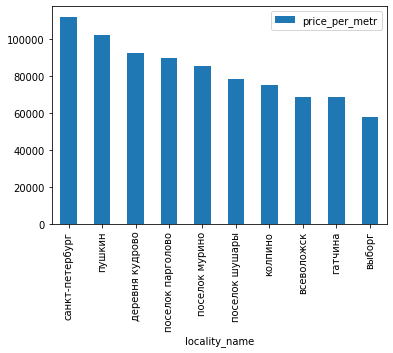

In [124]:
count_mean_10.pivot_table(index = 'locality_name', values = 'price_per_metr').sort_values(by = 'price_per_metr', ascending = False).plot(y = 'price_per_metr', kind = 'bar')

Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [125]:
price_10 = data.pivot_table(index = 'locality_name', values = "price_one_metr", aggfunc = 'mean')
price_10.sort_values(by = 'price_one_metr',inplace = True)
price_10

,price_one_metr
locality_name,
поселок совхозный,12556.000000
деревня малая романовка,12725.000000
поселок тесово-4,12931.000000
деревня выскатка,13208.000000
деревня сижно,13710.000000
...,...
пушкин,102698.518310
поселок репино,104238.500000
санкт-петербург,112301.117879


Создадим таблицы населённых пунктов с самой дорогой и самой дешёвой недвижимостью

In [126]:
price_10_down = price_10.iloc[:10]
price_10_up = price_10.iloc[-10:]
print(price_10_down)
print('\n'*3)
print(price_10_up.sort_values(by = "price_one_metr", ascending = False))

                         price_one_metr
locality_name                          
поселок совхозный               12556.0
деревня малая романовка         12725.0
поселок тесово-4                12931.0
деревня выскатка                13208.0
деревня сижно                   13710.0
поселок житково                 14956.0
поселок станции свирь           15000.0
поселок станции лужайка         15000.0
деревня ям-тесово               15094.0
поселок почап                   16038.0




                   price_one_metr
locality_name                    
зеленогорск         122510.052632
поселок лисий нос   113728.500000
санкт-петербург     112301.117879
поселок репино      104238.500000
пушкин              102698.518310
сестрорецк          102012.567416
кудрово             100353.311765
деревня мистолово    98550.000000
поселок левашово     96998.000000
мурино               92722.705882


По количеству предложений, самыми популярными населёнными пунктами являются: санкт-петербург, поселок мурино, поселок шушары, всеволожск, пушкин, колпино, поселок парголово, гатчина, деревня кудрово и выборг. Цена на квадратный метр общей площади в этих населённых пунктах колеблется от 57936р Выборге до 112301р в Петербурге. Самыми дорогими населёнными пунктами по средней цене за квадратный метр оказались: зеленогорск 122510р поселок лисий нос 113728р санкт-петербург 112301р поселок репино 104238р пушкин 102698р сестрорецк 102012р кудрово 100353р деревня мистолово 98550р поселок левашово 96998р мурино 92722р Самыми дешёвыми населёнными пунктами по средней цене за квадратный метр оказались: поселок совхозный 12556.р деревня малая романовка 12725.р поселок тесово-4 12931.р деревня выскатка 13208.р деревня сижно 13710.р поселок житково 14956.р поселок станции свирь 15000.р поселок станции лужайка 15000.р деревня ям-тесово 15094.р поселок почап 16038.р

Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра.

<AxesSubplot:xlabel='center_distance_km'>

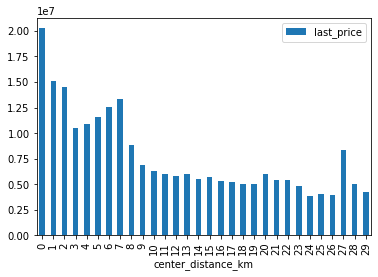

In [127]:
data[data['locality_name'] == 'санкт-петербург'].pivot_table(index = 'center_distance_km', values = 'last_price').plot(kind = 'bar')

In [128]:
data[data['locality_name'] == 'санкт-петербург']['center_distance_km'].astype("float").corr(data['last_price'])

-0.3738467219784772

In [129]:
data[data['center_distance_km'] == 27].sort_values(by = 'last_price', ascending = False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_metr,day_of_the_week,month_of_exposition,year_of_exposition,type_of_floor,center_distance_km,digit_type_of_floor
2346,20,29500000,115.00,2017-07-21,3,3.00,2,69.75,2,False,False,False,19.2,4,пушкин,14456.0,26609.0,3.0,229.0,3.0,172.0,328,256522.0,4,7,2017,последний,27,3
17887,15,24800000,190.00,2014-12-10,4,2.62,4,104.10,3,False,False,False,30.0,0,пушкин,15072.0,27226.0,1.0,114.0,0.0,NaN,<NA>,130526.0,2,12,2014,другой,27,2
137,8,16912000,105.70,2016-12-09,2,2.70,3,48.40,1,False,False,False,15.4,0,пушкин,14352.0,26506.0,3.0,366.0,3.0,179.0,390,160000.0,4,12,2016,первый,27,1
7773,17,16600000,106.00,2017-12-02,4,3.20,3,50.00,3,False,False,False,30.0,0,пушкин,14822.0,26976.0,1.0,254.0,0.0,NaN,<NA>,156604.0,5,12,2017,последний,27,3
15163,20,16000000,101.90,2018-01-08,2,2.87,4,48.10,1,False,False,False,26.9,0,пушкин,15201.0,27355.0,2.0,273.0,3.0,368.0,<NA>,157017.0,0,1,2018,первый,27,1
12132,11,15000000,89.60,2017-01-31,3,NaN,3,57.00,3,False,False,False,13.5,0,пушкин,15065.0,27218.0,3.0,317.0,3.0,509.0,357,167411.0,1,1,2017,последний,27,3
721,13,14350000,74.00,2017-11-28,2,3.13,5,30.00,3,False,False,False,25.0,0,санкт-петербург,23888.0,27313.0,1.0,1496.0,0.0,NaN,128,193919.0,1,11,2017,другой,27,2
4273,4,12300000,78.65,2017-09-09,3,NaN,5,48.00,1,False,False,False,11.0,0,пушкин,14567.0,26720.0,2.0,403.0,0.0,NaN,4,156389.0,5,9,2017,первый,27,1
2868,23,11350000,75.00,2017-08-15,3,3.50,2,52.70,2,False,False,False,8.7,4,пушкин,15337.0,27490.0,3.0,216.0,3.0,153.0,207,151333.0,1,8,2017,последний,27,3
21436,15,10900000,145.00,2017-04-17,2,3.50,2,39.00,2,False,False,False,10.0,0,пушкин,15337.0,27490.0,3.0,216.0,3.0,153.0,188,75172.0,0,4,2017,последний,27,3


Видим, что самая дорогая недвижимость, ожидаемо, в самом центре, до километра, далее более дешёвая недвижимость на расстоянии до 4х километров, потом резкое падение цены на 4км, с постепенным ростом до 8км. Выделяется всплеск на 27км, похоже это влияние дорогой недвижимости пушкинa.

Самыми популярными являются квартиры:

общей площадью от 40 до 68кв.м
жилой площадью 15-21кв.м и 22-34кв.м
с кухнями, площадью 5-11кв.м.
ценой от 2,5 до 6 млн.р
с высотой потолков от 2,5 до 2,8м
расположенных на средних этажах
в пяти-, девяти-, двенадцати- и шестнадцатиэтажных домах
расположенных на расстоянии 8-17км от центра города
расположенных от 10 до 28км от аэропорта
расположенных от 100 до 700м до ближайшего парка
Объявления о продаже реже публикуют в выходные, а чаще - в будни.
Меньше публикуют в декабре, мае и январе, чаще - с февраля по апрель и в ноябре.
Продажи до 90 дней можно считать быстрыми, а более 220 дней - медленными.
Факторы, которые больше всего влияют на общую (полную) стоимость объекта:
цена объекта недвижимости больше всего зависит (в порядке убывания) от общей и жилой площади, площади кухни и количества комнат. Мало зависит от этажа, на котором расположена квартира, с небольшой поправкой на первый этаж, где цена несколько ниже и почти не зависит от даты размещения объявления.
По количеству предложений, самыми популярными населёнными пунктами являются: санкт-петербург, поселок мурино, поселок шушары, всеволожск, пушкин, колпино, поселок парголово, гатчина, деревня кудрово и выборг. Цена на квадратный метр общей площади в этих населённых пунктах колеблется от 57936р Выборге до 112301р в Петербурге. Самыми дорогими населёнными пунктами по средней цене за квадратный метр оказались: зеленогорск 122510р, поселок лисий нос 113728р, санкт-петербург 112301р, поселок репино 104238р, пушкин 102698р, сестрорецк 102012р, кудрово 100353р, деревня мистолово 98550р, поселок левашово 96998р, мурино 92722р. Самыми дешёвыми населёнными пунктами по средней цене за квадратный метр оказались: поселок совхозный 12556.р деревня малая романовка 12725.р поселок тесово-4 12931.р деревня выскатка 13208.р деревня сижно 13710.р поселок житково 14956.р поселок станции свирь 15000.р поселок станции лужайка 15000.р деревня ям-тесово 15094.р поселок почап 16038.р.
Видим, что самая дорогая недвижимость, ожидаемо, в самом центре, до километра, далее более дешёвая недвижимость на расстоянии до 4х километров, потом резкое падение цены на 4км, с постепенным ростом до 8км. Выделяется всплеск на 27км, похоже, это влияние дорогой недвижимости Пушкинa.

### Общий вывод

Предоставленный архив содержит информацию, которую можно анализировать, если предварительно преобразовать часть типов данных и удалить выбросы.
В результате проведенного исследовательского анализа данных можно сказать, что больше всего на рынке представлено одно- и двух- комнатных квартир, чаще всего продают квартиры с потолками 2,5-2,8м. Самыми популярными являются пяти- и девятиэтажки. Быстрыми можно считать продажи до 90 дней, а медленные - более 220 дней. Кроме того, есть всплески продаж на 45, 60 и 90 дни, что, скорее всего, связано с особенностями размещения/удаления объявлений.
Цена на недвижимость прямо зависит от общей и жилой площади, в меньшей степени от площади кухни и количества комнат. Немного дешевле квартиры на первом этаже, в остальном цена от этажа зависит мало. Явной зависимости от даты размещения объявления не прослеживается.
По количеству предложений, самыми популярными населёнными пунктами являются: санкт-петербург, поселок мурино, поселок шушары, всеволожск, пушкин, колпино, поселок парголово, гатчина, деревня кудрово и выборг. Цена на квадратный метр общей площади в этих населённых пунктах колеблется от 57936р Выборге до 112301р в Петербурге.
Самыми дорогими населёнными пунктами по средней цене за квадратный метр оказались Зеленогорск, посёлок Лисий Нос, Санкт-Петербург, посёлок Репино и Пушкин.
Что касается Петербурга, то самая дорогая недвижимость в центре(до 4 км от центра), несколько меньше в радиусе до 8 км от центра, также наблюдается всплеск цены на расстоянии 27 км, что соответствует Пушкину.